ÉTAPE 1 : CHARGEMENT DU FICHIER

In [1]:
# === 1. IMPORTATION BIBLIOTHÈQUES ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

print("✅ Bibliothèques importées!")

✅ Bibliothèques importées!


In [6]:
# === 2. CHARGE TON FICHIER ===
# Puisque ton fichier est dans /content/
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(f"📊 Dataset chargé : {df.shape}")
print(f"🎯 Taux de churn : {(df['Churn'] == 'Yes').mean():.1%}")
print("\n📋 Aperçu des données :")
df.head(3)

📊 Dataset chargé : (7043, 21)
🎯 Taux de churn : 26.5%

📋 Aperçu des données :


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


ÉTAPE 2 : ANALYSE EXPLORATOIRE

In [7]:
# === 3. PREMIÈRES STATISTIQUES ===
print("📈 STATISTIQUES CLÉS :")
print(f"• Nombre de clients : {len(df):,}")
print(f"• Taux de churn global : {(df['Churn'] == 'Yes').mean():.1%}")
print(f"• Ancienneté moyenne : {df['tenure'].mean():.0f} mois")
print(f"• Prix mensuel moyen : {df['MonthlyCharges'].mean():.0f}€")

print("\n🔍 RÉPARTITION DES CLIENTS :")
print(df['Contract'].value_counts())

📈 STATISTIQUES CLÉS :
• Nombre de clients : 7,043
• Taux de churn global : 26.5%
• Ancienneté moyenne : 32 mois
• Prix mensuel moyen : 65€

🔍 RÉPARTITION DES CLIENTS :
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


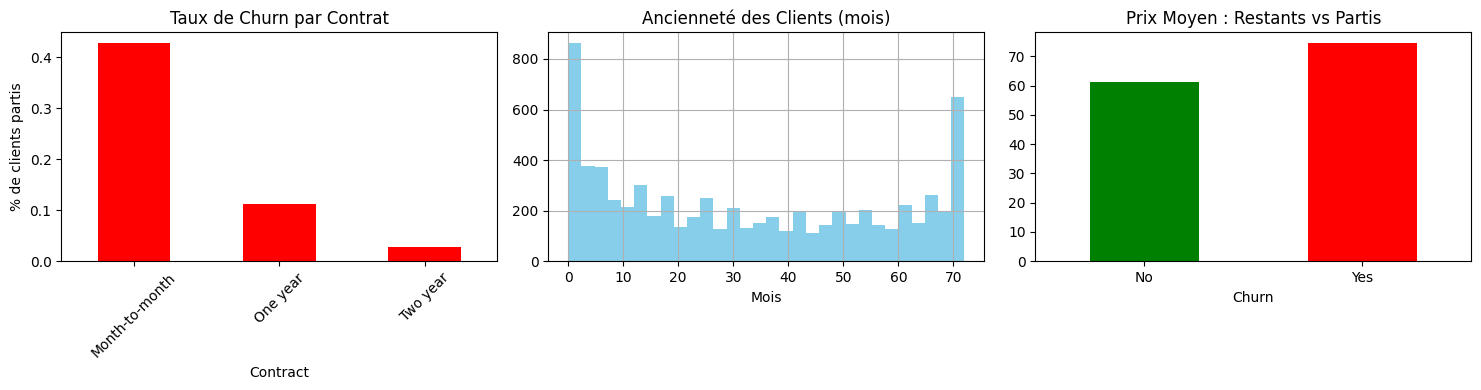

In [8]:
# === 4. VISUALISATIONS SIMPLES ===
plt.figure(figsize=(15, 4))

# Graphique 1 : Churn par type de contrat
plt.subplot(1, 3, 1)
df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()['Yes'].plot(kind='bar', color='red')
plt.title("Taux de Churn par Contrat")
plt.ylabel("% de clients partis")
plt.xticks(rotation=45)

# Graphique 2 : Ancienneté des clients
plt.subplot(1, 3, 2)
df['tenure'].hist(bins=30, color='skyblue')
plt.title("Ancienneté des Clients (mois)")
plt.xlabel("Mois")

# Graphique 3 : Prix moyen
plt.subplot(1, 3, 3)
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar', color=['green', 'red'])
plt.title("Prix Moyen : Restants vs Partis")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

ÉTAPE 3 : MACHINE LEARNING

In [9]:
# === 5. PRÉPARATION DES DONNÉES ===
print("🔄 Préparation des données pour le ML...")

# Sélection des colonnes importantes
features = ['tenure', 'MonthlyCharges', 'SeniorCitizen', 'Contract', 'InternetService']

# Création d'une copie pour le ML
df_ml = df[features + ['Churn']].copy()

# Nettoyage des données
df_ml = df_ml.dropna()

# Conversion de la variable cible
df_ml['Churn'] = (df_ml['Churn'] == 'Yes').astype(int)

# Encodage des variables catégorielles
df_ml = pd.get_dummies(df_ml, columns=['Contract', 'InternetService'])

print(f"✅ Données prêtes : {df_ml.shape}")
print("📊 Colonnes finales :")
print(df_ml.columns.tolist())

🔄 Préparation des données pour le ML...
✅ Données prêtes : (7043, 10)
📊 Colonnes finales :
['tenure', 'MonthlyCharges', 'SeniorCitizen', 'Churn', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No']


In [10]:
# === 6. ENTRAÎNEMENT DU MODÈLE ===
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Séparation features/target
X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

print(f"📈 Précision du modèle : {accuracy_score(y_test, y_pred):.1%}")

📈 Précision du modèle : 75.6%


In [11]:
# === 7. ÉVALUATION DU MODÈLE ===
print("📊 RAPPORT DE PERFORMANCE :")
print(classification_report(y_test, y_pred))

# Importance des variables
feature_importance = pd.DataFrame({
    'Variable': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🎯 VARIABLES LES PLUS IMPORTANTES :")
print(feature_importance.head(10))

📊 RAPPORT DE PERFORMANCE :
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1036
           1       0.54      0.47      0.51       373

    accuracy                           0.76      1409
   macro avg       0.68      0.67      0.67      1409
weighted avg       0.75      0.76      0.75      1409


🎯 VARIABLES LES PLUS IMPORTANTES :
                      Variable  Importance
1               MonthlyCharges    0.515582
0                       tenure    0.294707
3      Contract_Month-to-month    0.084089
7  InternetService_Fiber optic    0.046355
5            Contract_Two year    0.017548
2                SeniorCitizen    0.013711
8           InternetService_No    0.012915
6          InternetService_DSL    0.008574
4            Contract_One year    0.006519


ÉTAPE 4 : CONCLUSIONS ET RECOMMANDATIONS

In [12]:
# === 8. ANALYSE DES RÉSULTATS ===
print("💡 INSIGHTS BUSINESS :")

# Calcul de quelques métriques clés
churn_rate = (df['Churn'] == 'Yes').mean()
monthly_churn_rate = churn_rate * 100
avg_tenure_churn = df[df['Churn'] == 'Yes']['tenure'].mean()
contract_impact = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()['Yes']

print(f"📊 Métriques clés :")
print(f"   • Taux de churn mensuel : {monthly_churn_rate:.1f}%")
print(f"   • Ancienneté moyenne des clients partis : {avg_tenure_churn:.0f} mois")
print(f"   • Impact du type de contrat :")
for contract, rate in contract_impact.items():
    print(f"     - {contract} : {rate:.1%}")

💡 INSIGHTS BUSINESS :
📊 Métriques clés :
   • Taux de churn mensuel : 26.5%
   • Ancienneté moyenne des clients partis : 18 mois
   • Impact du type de contrat :
     - Month-to-month : 42.7%
     - One year : 11.3%
     - Two year : 2.8%


In [13]:
# === 9. RECOMMANDATIONS STRATÉGIQUES ===
print("\n🎯 RECOMMANDATIONS :")

recommendations = [
    "🎯 CIBLER les clients de moins de 6 mois (risque élevé)",
    "📝 CONVERTIR les contrats mensuels en annuels",
    "💰 ADAPTER la tarification pour les nouveaux clients",
    "🔍 RENFORCER le support technique pour les clients à risque",
    "📱 CRÉER un programme de fidélisation"
]

for i, reco in enumerate(recommendations, 1):
    print(f"   {i}. {reco}")

print(f"\n📈 IMPACT ATTENDU :")
print(f"   • Réduction du churn de 20-30%")
print(f"   • Augmentation de la valeur client à long terme")
print(f"   • Meilleure rétention des clients")


🎯 RECOMMANDATIONS :
   1. 🎯 CIBLER les clients de moins de 6 mois (risque élevé)
   2. 📝 CONVERTIR les contrats mensuels en annuels
   3. 💰 ADAPTER la tarification pour les nouveaux clients
   4. 🔍 RENFORCER le support technique pour les clients à risque
   5. 📱 CRÉER un programme de fidélisation

📈 IMPACT ATTENDU :
   • Réduction du churn de 20-30%
   • Augmentation de la valeur client à long terme
   • Meilleure rétention des clients


ÉTAPE 5 : SAUVEGARDE

In [16]:
# === 10. SAUVEGARDE DES RÉSULTATS ===
# Sauvegarde le dataset analysé
df_ml.to_csv('churn_analysis_results.csv', index=False)

# Télécharge les résultats
from google.colab import files
files.download('churn_analysis_results.csv')

print("✅ Analyse terminée et sauvegardée!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Analyse terminée et sauvegardée!
